# pandas  画图
- DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

## 参数说明
- ax：matplotlib轴对象，默认为None。
- subplots：默认为False，如果为True则为每列数据制作单独的子图。
- sharex 、sharey : 布尔值，共享x，y轴。
- layout : 元组（行，列）用于子图的布局。
- figsize：元组（宽度，高度），以英寸为单位。
- use_index：布尔值，默认为True，使用index作为x轴的坐标。
- title：字符串或列表，用于图的标题。如果传入一个字符串，则在图的顶部打印字符串。如果传入的是一个列表且子图为True，则在相应子图上方打印列表中的每个项目。
- grid：布尔值，默认为None，是否显示网格线。

# 数据导入

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
def name_for_target(target):
    num = len(iris.target_names)
    if target < num:
        return iris.target_names[target]
    else:
        return np.nan

In [42]:
df = pd.DataFrame(data = iris.data, columns = ['l1', 'l2', 'l3', 'l4'])
# df['label'] = iris.target
df['name'] = list(map(name_for_target, iris.target)) 
df.head()

,l1,l2,l3,l4,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 画图

## 直接画图

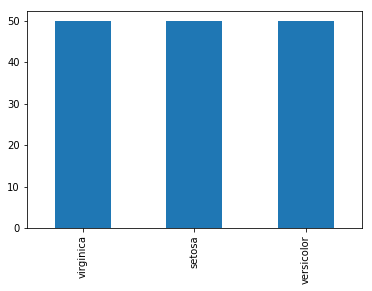

In [43]:
df.name.value_counts().plot(kind = 'bar')

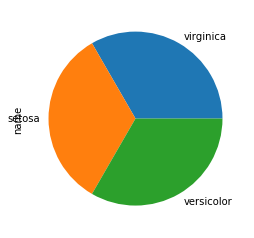

In [44]:
df.name.value_counts().plot(kind = 'pie')

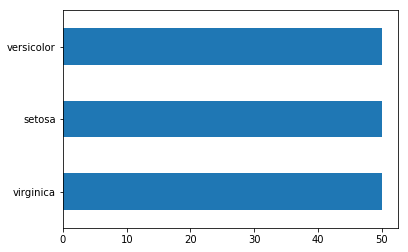

In [45]:
df.name.value_counts().plot(kind = 'barh')

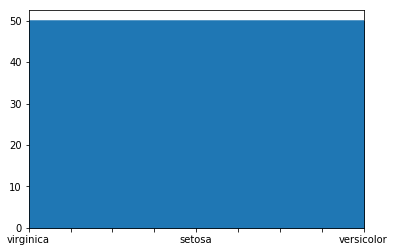

In [46]:
df.name.value_counts().plot(kind = 'area')

## 指定x y

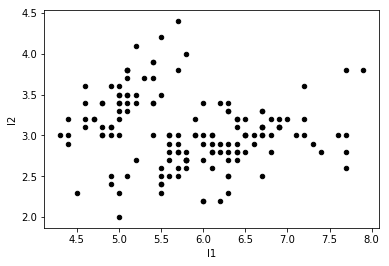

In [47]:
df.plot(kind = 'scatter', x = 'l1', y = 'l2', color='black')

### 指定图形颜色

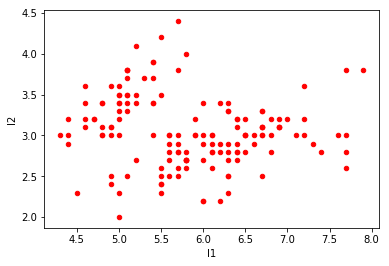

In [48]:
df.plot(kind = 'scatter', x = 'l1', y = 'l2', color='red')

# 多个图

## 一个图中多个数据

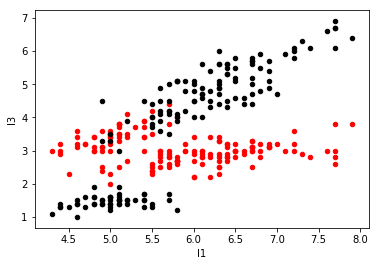

In [50]:
ax = df.plot(kind = 'scatter', x = 'l1', y = 'l2', color='red') 
df.plot(kind = 'scatter', x = 'l1', y = 'l3', color='black', ax=ax)

## 多个画布

In [35]:
import matplotlib.pyplot as plt

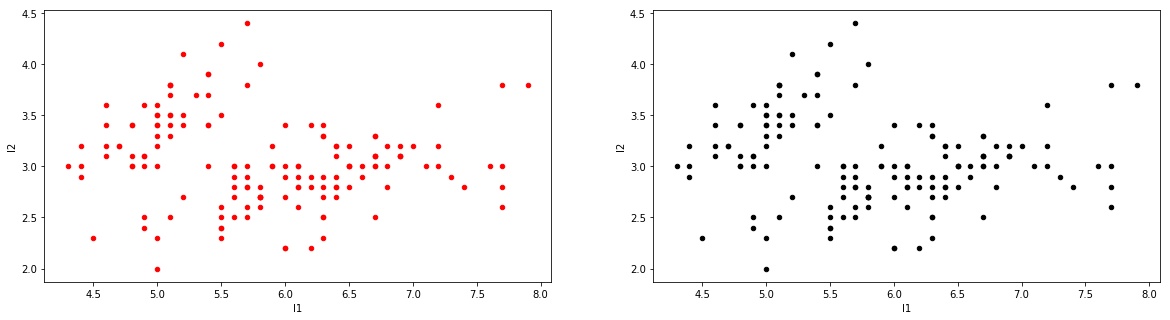

In [51]:
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
df.plot(kind = 'scatter', x = 'l1', y = 'l2', color='red', ax = ax1)
df.plot(kind = 'scatter', x = 'l1', y = 'l2', color='black', ax=ax2)

# 多个属性对比

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a2fbe80>,
      dtype=object)

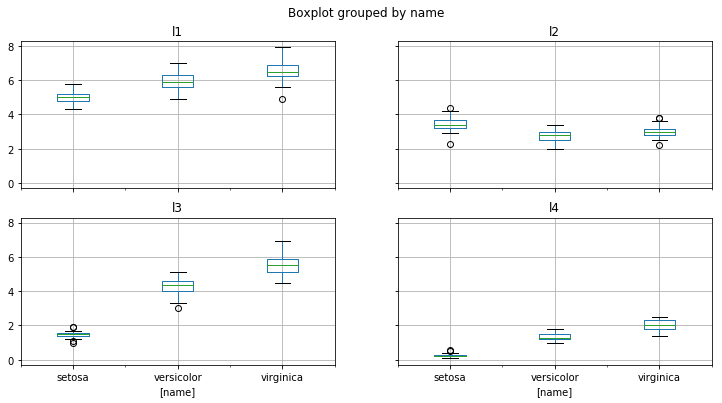

In [52]:
# 讲解完seaborn之后，让我们回到pandas中
# 我们可以快速制作一个Pandas的箱形图，每个特征按物种划分
df.boxplot(by="name", figsize=(12, 6))

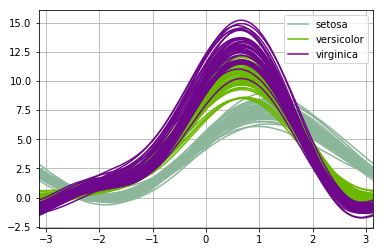

In [57]:
# Andrews曲线涉及使用样本的属性作为傅立叶级数的系数，然后进行绘制
from pandas.plotting import andrews_curves
andrews_curves(df, "name")

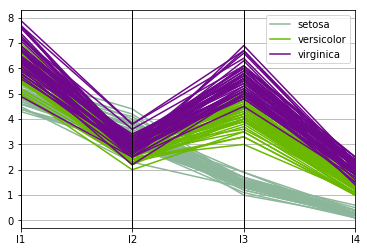

In [58]:
# 轮廓图也是看高维数据的一种方法，将不同的特征放在横坐标，然后将各点的特征值放在纵坐标就可以了
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "name")

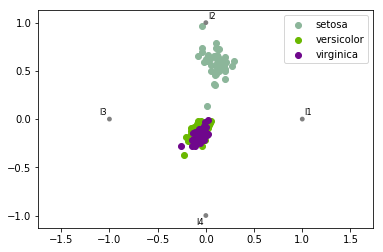

In [60]:
# 这也是一种将高维点表现在二维平面的方法，具体作图方法应该在上面的网址上应该有
from pandas.plotting import radviz
radviz(df, "name")